# Method descriptions

* **centralized** finds global classifier using the centralized data
* Average local classifiers between neighbors
  * **avg-unweighted** all the edges have the same value
  * **avg-weighted** algorithm weights an edge as the *similarity* between the two nodes *times* the *number of instances* of the neighbor (normalized)
* **regularised** learns local classifiers keeping them similar to the neighbors' classifiers
* **local** learns independent local classifiers


In [35]:
# imports
import numpy as np

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

import sys
sys.path.append('../src/')

from utils import generate_models, generate_moons

import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
N = 1
D = 20

NODE = 0

V, theta_true, cluster_indexes = generate_models(nb_clust=1, nodes_per_clust=N, random_state=random_state)
_, X, Y, X_test, Y_test, _, _ = generate_moons(V, theta_true, D, random_state=random_state, sample_error_rate=NOISE_R)


In [37]:
# set weak classifier
dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(X[NODE], Y[NODE])

adaboosted_clf = AdaBoostClassifier(base_estimator=dt_stump, n_estimators=2*D)
adaboosted_clf.fit(X[NODE], Y[NODE])

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=40, random_state=None)

### Visualize classification


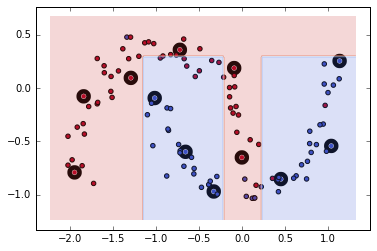

In [38]:
plt.figure(1)

# construct grid
x_min, x_max = X_test[NODE][:,0].min() - 0.2, X_test[NODE][:,0].max() + 0.2
y_min, y_max = X_test[NODE][:,1].min() - 0.2, X_test[NODE][:,1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# expand dimensions
grid_set = np.c_[xx.ravel(), yy.ravel()]
grid_set = np.hstack((grid_set, np.zeros((len(grid_set), D - 2))))
y = adaboosted_clf.predict(grid_set).reshape(xx.shape)

plt.scatter(X[NODE][:,0], X[NODE][:,1], c=Y[NODE], cmap=plt.cm.coolwarm, linewidths=10)
plt.scatter(X_test[NODE][:,0], X_test[NODE][:,1], c=Y_test[NODE], cmap=plt.cm.coolwarm)

plt.contourf(xx, yy, y, cmap=plt.cm.coolwarm, alpha=0.2)

In [39]:
print(len(adaboosted_clf.estimators_))

40


In [40]:
print(adaboosted_clf.estimator_weights_, adaboosted_clf.feature_importances_)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.] [ 0.575  0.425  0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.   ]


In [45]:
for i, e in enumerate(adaboosted_clf.estimators_):
    print("stump=", i, ", feature=", e.tree_.feature[0], ", threshold=", e.tree_.threshold[0])

stump= 0 , feature= 0 , threshold= -1.15674591064
stump= 1 , feature= 0 , threshold= 0.222419440746
stump= 2 , feature= 1 , threshold= -0.0867988616228
stump= 3 , feature= 0 , threshold= -0.212449789047
stump= 4 , feature= 0 , threshold= 0.222419440746
stump= 5 , feature= 0 , threshold= -0.212449789047
stump= 6 , feature= 1 , threshold= 0.304559975863
stump= 7 , feature= 1 , threshold= -0.624667227268
stump= 8 , feature= 1 , threshold= -0.822303652763
stump= 9 , feature= 1 , threshold= -0.624667227268
stump= 10 , feature= 1 , threshold= -0.0867988616228
stump= 11 , feature= 1 , threshold= -0.624667227268
stump= 12 , feature= 0 , threshold= -1.15674591064
stump= 13 , feature= 0 , threshold= -0.212449789047
stump= 14 , feature= 0 , threshold= 0.222419440746
stump= 15 , feature= 1 , threshold= -0.0867988616228
stump= 16 , feature= 0 , threshold= -0.212449789047
stump= 17 , feature= 0 , threshold= 0.222419440746
stump= 18 , feature= 0 , threshold= -0.212449789047
stump= 19 , feature= 1 , t